# CONFIG

In [197]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import json
import time
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import NaN
df = pd.read_csv("60k.csv")

# TEST DATASET

    - Replace -1 by NaN
    - Remove NaN for essential features
    - Remove duplicates

In [198]:
df = df.replace(-1, NaN)

In [199]:
df.dropna(subset='price', inplace = True)
df.dropna(subset='number_of_bedrooms', inplace = True)
df.dropna(subset='surface', inplace = True)

# TRAIN DATASET

- Drop column w.o. price correlation

In [200]:
df_train = df

In [201]:
del df_train["Unnamed: 0"]
del df_train["id"]
del df_train["locality"]
del df_train["fully_equipped_kitchen"]
del df_train["kitchen_type"]
del df_train["land_surface"]
del df_train["number_of_facades"]
del df_train["garden_surface"]
del df_train["terrace_surface"]
del df_train["furnished"]
del df_train["open_fire"]
del df_train["state_of_the_building"]
del df_train["region"]
del df_train["province"]

- Replace NaN by 0 for selected features

In [202]:
df_train["swimming_pool"] = df_train["swimming_pool"].replace(NaN, 0).astype(int)
df_train["garden"] = df_train["garden"].replace(NaN, 0).astype(int)
df_train["terrace"] = df_train["terrace"].replace(NaN, 0).astype(int)

# print(df["swimming_pool"].unique())
# print(df["garden"].unique())
# print(df["terrace"].unique())

- Drop NaN in selected features

In [203]:
df_train.drop(df_train.index[df_train['type_of_property'] == 'HOUSE_GROUP'], inplace=True)
df_train.drop(df_train.index[df_train['type_of_property'] == 'APPARTMENT_GROUP'], inplace=True)
df_train.drop(df_train.index[df_train['type_of_sale'] != 'residential_sale'], inplace=True)

In [204]:
df.to_csv("data_cleaned_final.csv")

- Remove outliers for price and surface

In [205]:
upper_lim = df_train['price'].quantile(.80)
lower_lim = df_train['price'].quantile(.20)
data = df_train[(df_train['price'] < upper_lim) & (df_train['price'] > lower_lim)]

upper_lim = df['surface'].quantile(.80)
lower_lim = df['surface'].quantile(.20)
data = df_train[(df_train['surface'] < upper_lim) & (df_train['surface'] > lower_lim)]

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_11035/3623565615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Var_Corr = df_train.corr()


<AxesSubplot: >

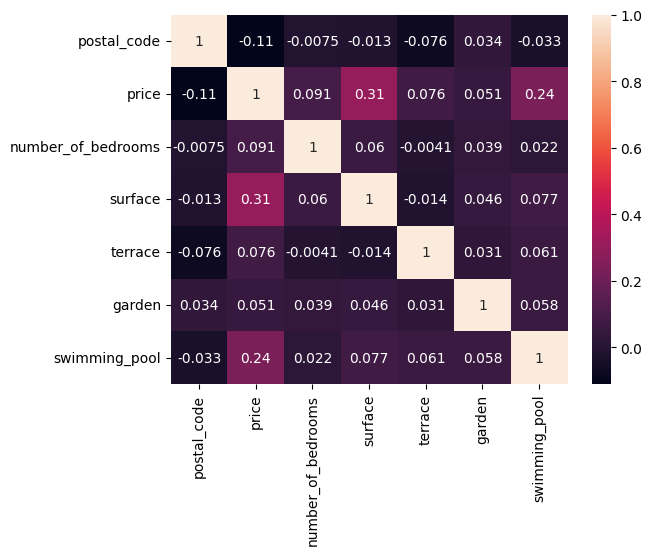

In [206]:
#del df["id"]
Var_Corr = df_train.corr()
# plot the heatmap and annotation on it
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)